# Analysis of scaling execution times

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [80]:
mpi_strong_times = pd.read_csv('mpi_strong_scaling.csv')
mpi_weak_times = pd.read_csv('mpi_weak_scaling.csv')
omp_strong_times = pd.read_csv('omp_strong_scaling.csv')
omp_weak_times = pd.read_csv('omp_weak_scaling.csv')

## MPI Strong Scaling

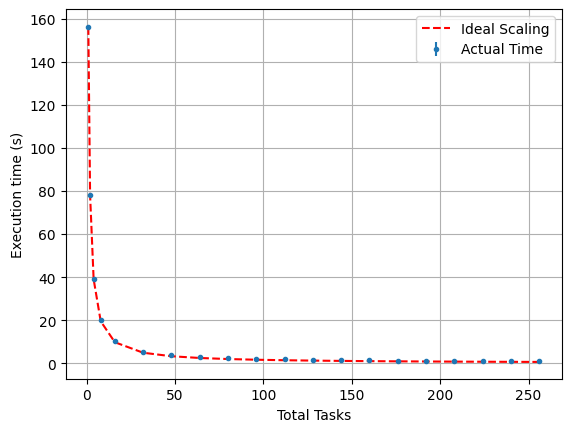

In [81]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Elapsed Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling.png')
plt.show()

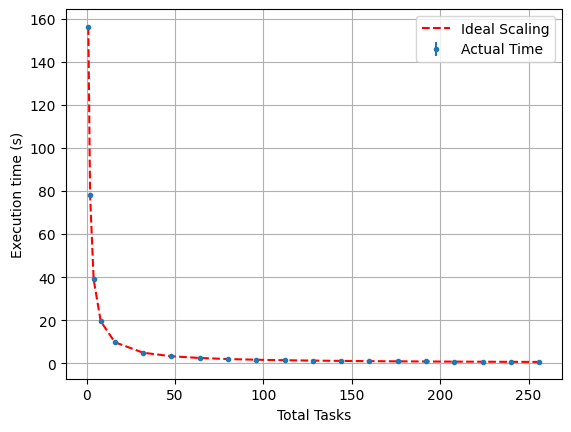

In [82]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

serial_time = mpi_strong_mean_times['Computation Time(s)'].iloc[0]
ideal_time = serial_time / mpi_strong_mean_times.index

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Computation Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(mpi_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')

plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')

plt.grid()
plt.legend()
plt.savefig('figures/mpi_strong_scaling_computation.png')
plt.show()

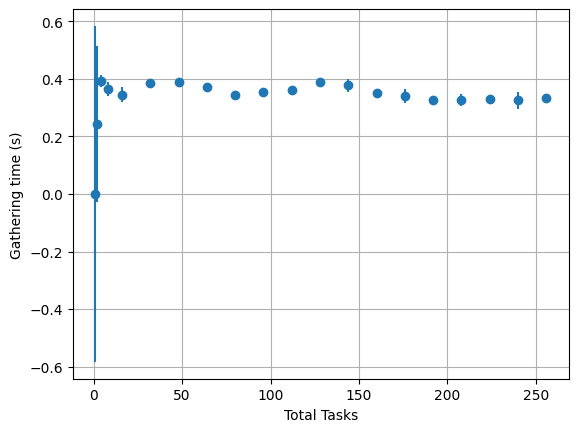

In [83]:
mpi_strong_mean_times = mpi_strong_times.groupby('Total Tasks').mean()
mpi_strong_std_times = mpi_strong_times.groupby('Total Tasks').std()

plt.errorbar(mpi_strong_mean_times.index, mpi_strong_mean_times['Gathering Time(s)'], yerr=mpi_strong_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Gathering time (s)')
plt.grid()
plt.savefig('figures/mpi_strong_scaling_gathering.png')
plt.show()

## Speedup and Efficiency of MPI Strong Scaling

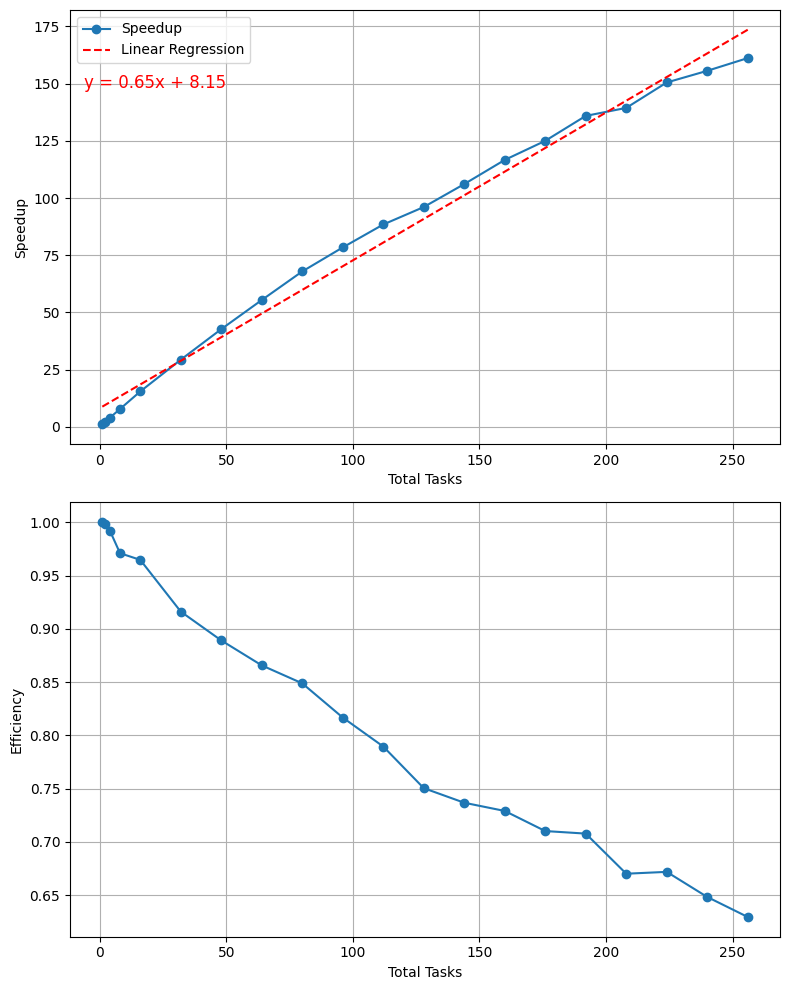

In [84]:
mpi_strong_serial_time = mpi_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

mpi_strong_speedup = mpi_strong_serial_time / mpi_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(mpi_strong_mean_times.index, mpi_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Total Tasks')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()


x = mpi_strong_mean_times.index#[:11]
y = mpi_strong_speedup#[:11]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)


ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)

ax1[0].legend()
plt.tight_layout()

ax1[1].plot(mpi_strong_mean_times.index, mpi_strong_speedup /  mpi_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Total Tasks')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/mpi_strong_scaling_speedup_efficiency.png')
plt.show()

In [85]:
print(mpi_strong_mean_times)
print(mpi_strong_speedup)

             Iteration  Elapsed Time(s)  Computation Time(s)  \
Total Tasks                                                    
1                  2.0       156.168608           156.168553   
2                  2.0        78.241364            77.997994   
4                  2.0        39.354186            38.961635   
8                  2.0        20.105063            19.740195   
16                 2.0        10.117836             9.773159   
32                 2.0         5.326953             4.942599   
48                 2.0         3.659353             3.271484   
64                 2.0         2.818717             2.444724   
80                 2.0         2.299779             1.954706   
96                 2.0         1.991785             1.633718   
112                2.0         1.766030             1.400555   
128                2.0         1.625706             1.230716   
144                2.0         1.471910             1.090014   
160                2.0         1.338729 

## MPI Weak Scaling

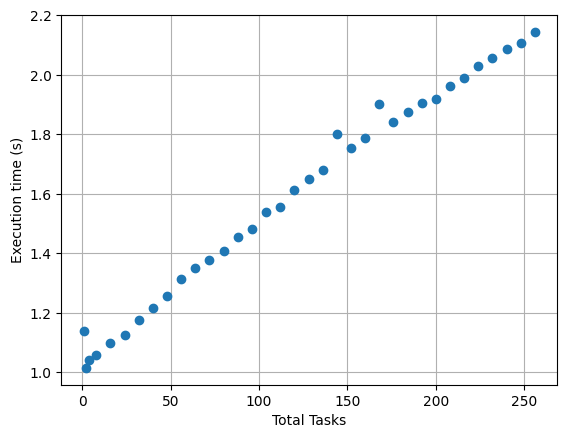

In [86]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Elapsed Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Execution time (s)')
plt.grid()
plt.savefig('figures/mpi_weak_scaling.png')
plt.show()

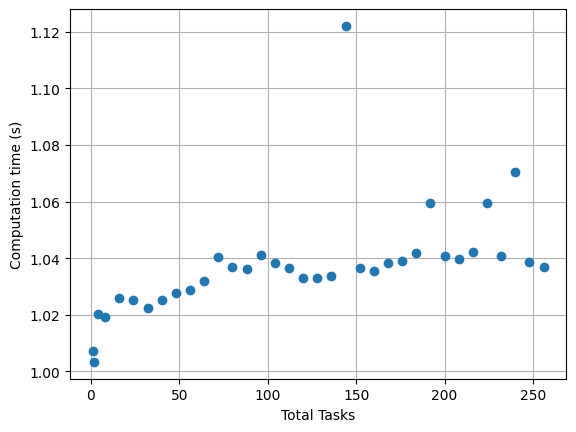

In [96]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Computation Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Computation time (s)')
plt.grid()
plt.savefig('figures/mpi_weak_scaling_computation.png')
plt.show()

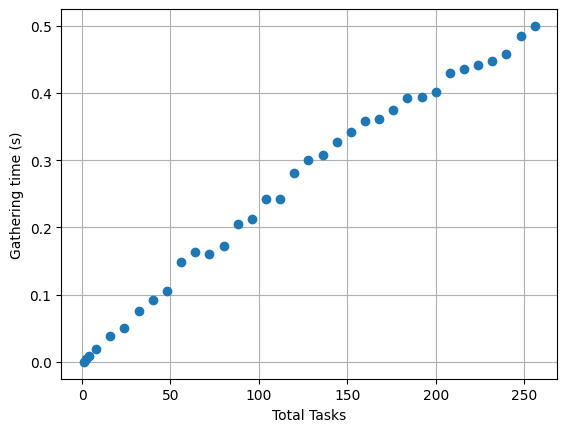

In [95]:
mpi_weak_mean_times = mpi_weak_times.groupby('Total Tasks').mean()
mpi_weak_std_times = mpi_weak_mean_times.groupby('Total Tasks').std()

plt.errorbar(mpi_weak_mean_times.index, mpi_weak_mean_times['Gathering Time(s)'], yerr=mpi_weak_std_times['Elapsed Time(s)'], fmt='o')
plt.xlabel('Total Tasks')
plt.ylabel('Gathering time (s)')
plt.savefig('figures/mpi_weak_scaling_gathering.png')
plt.grid()
plt.show()

## Speedup and Efficiency of MPI Weak Scaling

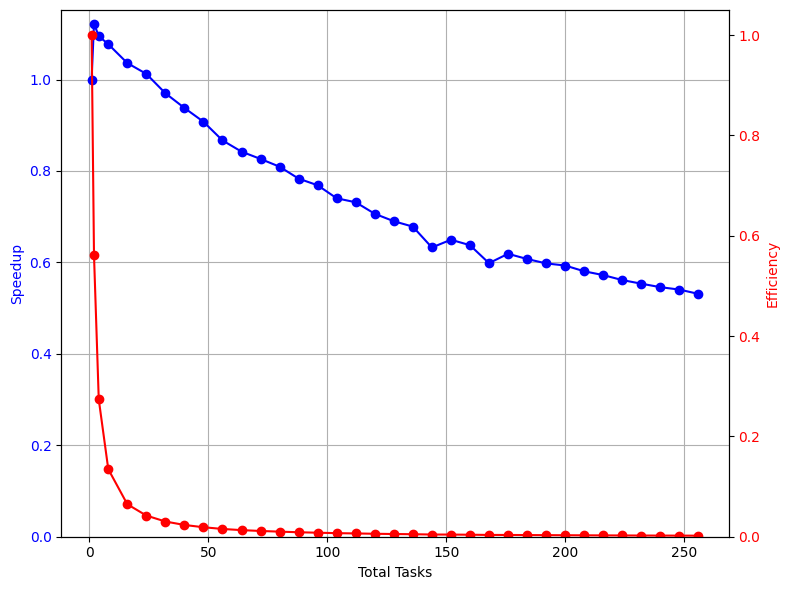

In [88]:
mpi_weak_serial_time = mpi_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = mpi_weak_serial_time / mpi_weak_mean_times['Elapsed Time(s)']
ax1.plot(mpi_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Total Tasks')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / mpi_weak_mean_times.index
ax2.plot(mpi_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/mpi_weak_scaling_speedup_efficiency.png')
plt.show()

## OpenMP Strong Scaling

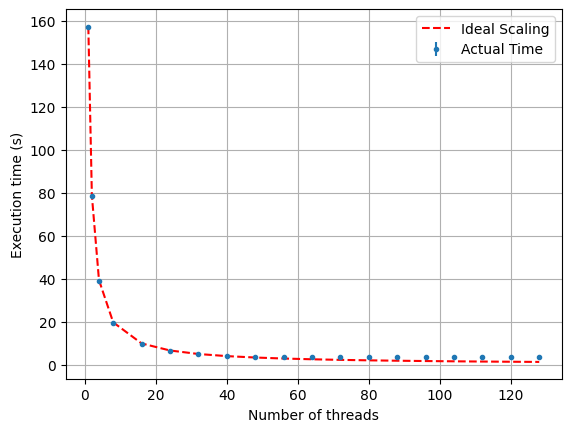

In [89]:
omp_strong_mean_times = omp_strong_times.groupby('Threads').mean()
omp_strong_std_times = omp_strong_times.groupby('Threads').std()
serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]
ideal_time = serial_time / omp_strong_mean_times.index

plt.errorbar(omp_strong_mean_times.index, omp_strong_mean_times['Elapsed Time(s)'], yerr=omp_strong_std_times['Elapsed Time(s)'], fmt='o', markersize=3, label='Actual Time')
plt.plot(omp_strong_mean_times.index, ideal_time, '--', color='r', label='Ideal Scaling')
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
plt.grid()
plt.legend()
plt.savefig('figures/omp_strong_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Strong Scaling

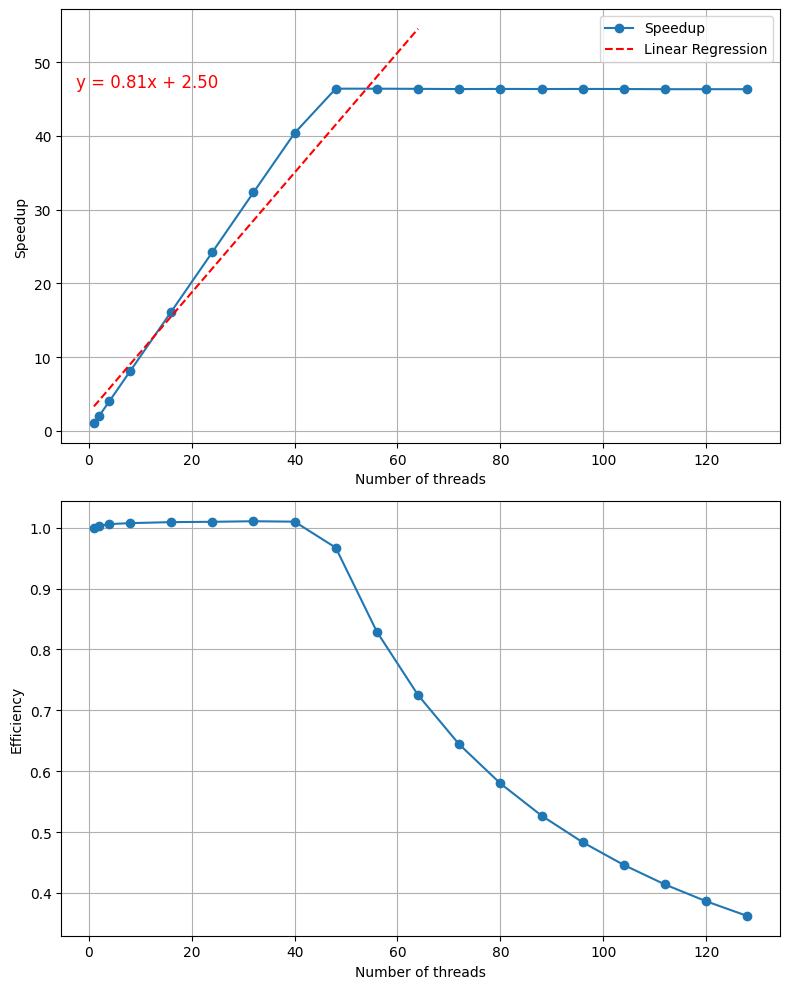

In [90]:
omp_strong_serial_time = omp_strong_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(2, 1, figsize=(8, 10))

omp_strong_speedup = omp_strong_serial_time / omp_strong_mean_times['Elapsed Time(s)']
ax1[0].plot(omp_strong_mean_times.index, omp_strong_speedup, '-o', label='Speedup')
ax1[0].set_xlabel('Number of threads')
ax1[0].set_ylabel('Speedup')
ax1[0].grid()

x = omp_strong_mean_times.index[:11]
y = omp_strong_speedup[:11]
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)

ax1[0].plot(x, linear_model(x), 'r--', label='Linear Regression')
slope, intercept = coefficients
ax1[0].text(0.02, 0.82, f'y = {slope:.2f}x + {intercept:.2f}', transform=ax1[0].transAxes, color='red', fontsize=12)
ax1[0].legend()
plt.tight_layout()

ax1[1].plot(omp_strong_mean_times.index, omp_strong_speedup / omp_strong_mean_times.index, '-o', label='Efficiency')
ax1[1].set_xlabel('Number of threads')
ax1[1].set_ylabel('Efficiency')
ax1[1].grid()

plt.tight_layout()
plt.savefig('figures/omp_strong_scaling_speedup_efficiency.png')
plt.show()

In [91]:
print(omp_strong_mean_times)
print(omp_strong_speedup)

         Iteration  Elapsed Time(s)
Threads                            
1              1.5       157.431285
2              1.5        78.466654
4              1.5        39.129189
8              1.5        19.533833
16             1.5         9.750880
24             1.5         6.497188
32             1.5         4.868405
40             1.5         3.897426
48             1.5         3.391414
56             1.5         3.391536
64             1.5         3.393159
72             1.5         3.395397
80             1.5         3.393950
88             1.5         3.395035
96             1.5         3.394197
104            1.5         3.394913
112            1.5         3.396719
120            1.5         3.396616
128            1.5         3.396653
Threads
1       1.000000
2       2.006346
4       4.023372
8       8.059416
16     16.145341
24     24.230680
32     32.337347
40     40.393656
48     46.420544
56     46.418868
64     46.396672
72     46.366084
80     46.385852
88     46.37102

## OpenMP Weak Scaling

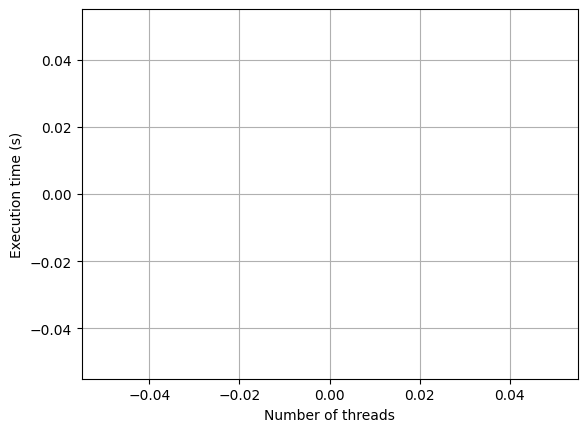

In [92]:
omp_weak_mean_times = omp_weak_times.groupby('Threads').mean()
omp_weak_std_times = omp_weak_times.groupby('Threads').std()

plt.errorbar(omp_weak_mean_times.index, omp_weak_mean_times['Elapsed Time(s)'], yerr=omp_weak_std_times['Elapsed Time(s)'], fmt='o', markersize=4)
plt.xlabel('Number of threads')
plt.ylabel('Execution time (s)')
#plt.ylim(0, None)
plt.grid()
plt.savefig('figures/omp_weak_scaling.png')
plt.show()

## Speedup and Efficiency of OpenMP Weak Scaling

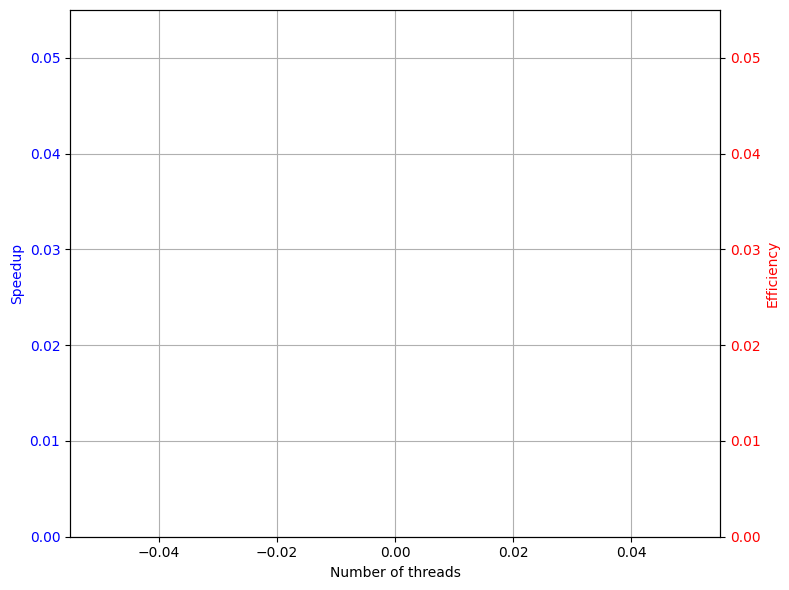

In [93]:
omp_weak_serial_time = omp_weak_mean_times['Elapsed Time(s)'].iloc[0]

fig, ax1 = plt.subplots(figsize=(8, 6))

speedup = omp_weak_serial_time / omp_weak_mean_times['Elapsed Time(s)']
ax1.plot(omp_weak_mean_times.index, speedup, '-o', color='b', label='Speedup')
ax1.set_xlabel('Number of threads')
ax1.set_ylabel('Speedup', color='b')
ax1.grid()
ax1.set_ylim(0, None)
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
efficiency = speedup / omp_weak_mean_times.index
ax2.plot(omp_weak_mean_times.index, efficiency, '-o', color='r', label='Efficiency')
ax2.set_ylabel('Efficiency', color='r')
ax2.set_ylim(0, None)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.savefig('figures/omp_weak_scaling_speedup_efficiency.png')
plt.show()